# (2강-실습-5) Text

## 0. 들어가기 앞서

- **실습 개요**: Matplotlib을 사용하여 다양한 텍스트 활용법을 사용한다.
- **실습 진행 목적 및 배경**:
  - 텍스트 요소를 직접 구현하며 시각화에 대한 이해를 높인다.
- **실습 수행으로 얻어갈 수 있는 역량**:
  - matplotlib을 통한 텍스트 활용 역량
- **데이터셋 개요 및 저작권 정보**:
  - [Student Performance Dataset](http://roycekimmons.com/tools/generated_data/exams) ([Kaggle Ver.](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)) | CC0 1.0 Universal Public Domain Dedication
- **실습 핵심 내용**
  - 텍스트의 다양한 요소 실습 (title, text, label)

## 1. Text API in Matplotlib

기본적인 요소를 다시 한 번 살펴보겠습니다.

|pyplot API|Objecte-oriented API|description|
|-|-|-|
|`suptitle`|`suptitle`|title of figure|
|`title`|`set_title`|title of subplot `ax`|
|`xlabel`|`set_xlabel`|x-axis label|
|`ylabel`|`set_ylabel`|y-axis label|
|`figtext`|`text`|figure text|
|`text`|`text`|Axes taext|
|`annoatate`|`annotate`|Axes annotation with arrow|

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt

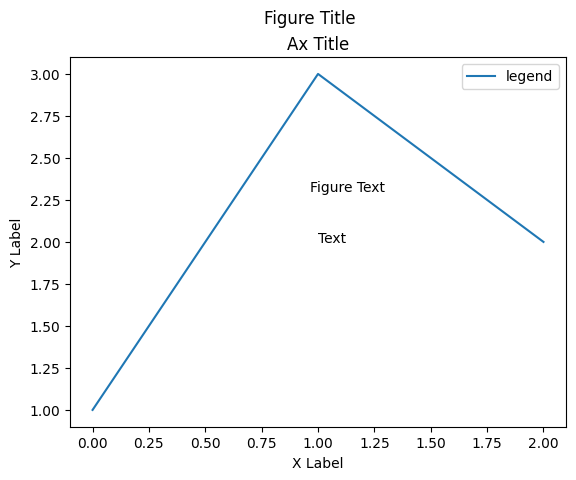

In [2]:
fig, ax = plt.subplots()

fig.suptitle('Figure Title')

ax.plot([1, 3, 2], label='legend')
ax.legend()

ax.set_title('Ax Title')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

ax.text(x=1,y=2, s='Text')
fig.text(0.5, 0.6, s='Figure Text')

plt.show()

## 2. Text Properties

### 2-1. Font Components

가장 쉽게 바꿀 수 있는 요소로는 다음 요소가 있습니다.

- `family`
- `size` or `fontsize`
- `style` or `fontstyle`
- `weight` or `fontweight`



글씨체에 따른 가독성 관련하여는 다음 내용을 참고하면 좋습니다.

- [Material Design : Understanding typography](https://material.io/design/typography/understanding-typography.html)
- [StackExchange : Is there any research with respect to how font-weight affects readability?](https://ux.stackexchange.com/questions/52971/is-there-any-research-with-respect-to-how-font-weight-affects-readability)



아래는 [Fonts Demo](https://matplotlib.org/stable/gallery/text_labels_and_annotations/fonts_demo.html)입니다.

![](https://matplotlib.org/stable/_images/sphx_glr_fonts_demo_001.png)

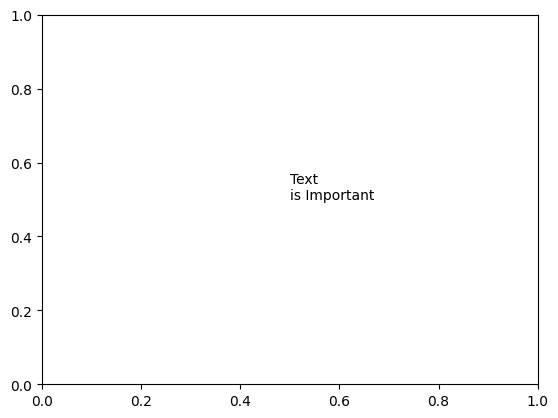

In [3]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
#         fontsize=20,
#         fontweight='bold',
#         fontfamily='serif',
       )


plt.show()

### 2-2. Details

폰트 자체와는 조금 다르지만 커스텀할 수 있는 요소들입니다.

- `color`
- `linespacing`
- `backgroundcolor`
- `alpha`
- `zorder`
- `visible`


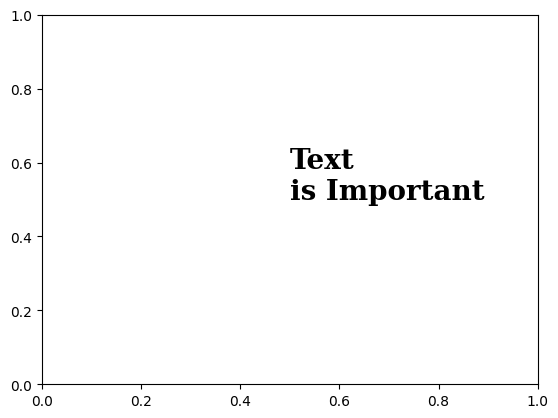

In [4]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
#         color='royalblue',
#         linespacing=2,
#         backgroundcolor='lightgray',
#         alpha=0.5    # 투명도
       )


plt.show()

### 2-3. Alignment

정렬과 관련하여 이런 요소들을 조정할 수 있습니다.

- `ha` : horizontal alignment
- `va` : vertical alignment
- `rotation`
- `multialignment`


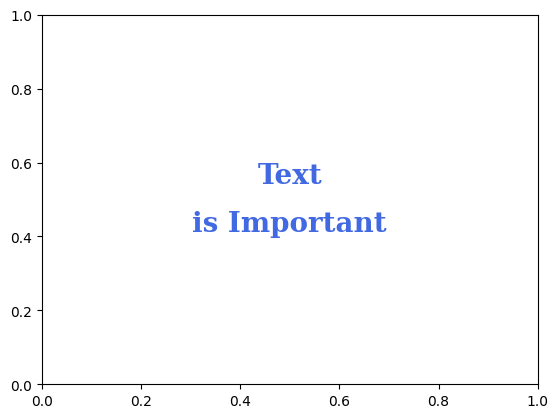

In [5]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='royalblue',
        linespacing=2,
        va='center', # top, bottom, center
        ha='center', # left, right, center
        rotation='horizontal' # vertical?
       )


plt.show()

### 2-4. Advanced

- `bbox`

- [Drawing fancy boxes](https://matplotlib.org/stable/gallery/shapes_and_collections/fancybox_demo.html)

![image.png](https://matplotlib.org/stable/_images/sphx_glr_fancybox_demo_001.png)

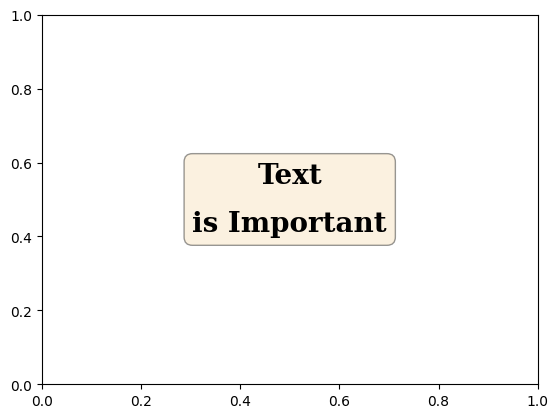

In [6]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='black',
        linespacing=2,
        va='center', # top, bottom, center
        ha='center', # left, right, center
        rotation='horizontal', # vertical?
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.4)
       )


plt.show()

## 3. Text API 별 추가 사용법 with 실습

### 3-0. 기본적인 플롯

In [7]:
student = pd.read_csv('./StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


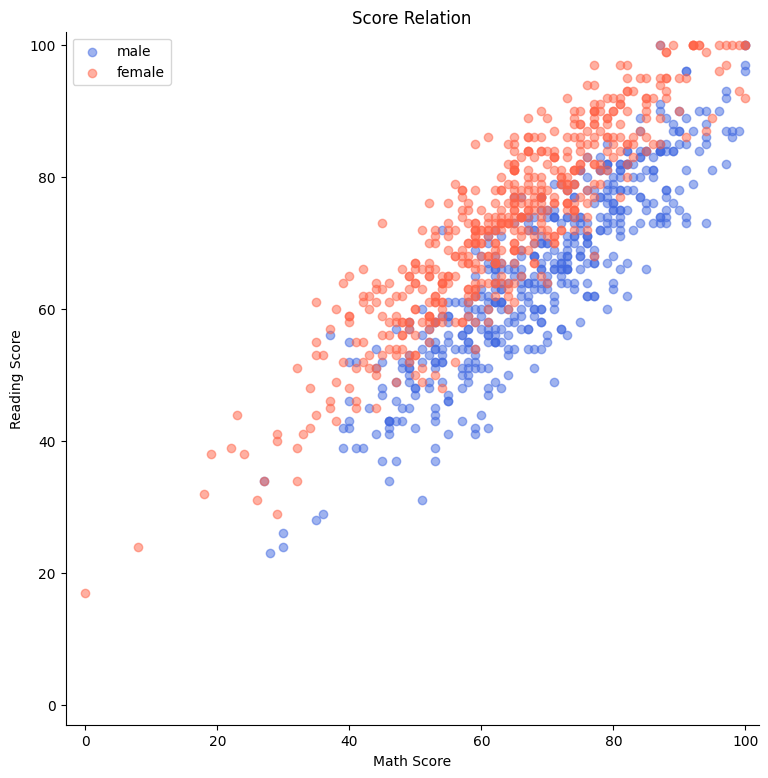

In [8]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

for g, c in zip(['male', 'female'], ['royalblue', 'tomato']):
    student_sub = student[student['gender']==g]
    ax.scatter(x=student_sub ['math score'], y=student_sub ['reading score'],
               c=c,
               alpha=0.5, 
               label=g)
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation') 
ax.legend()   

plt.show()

### 3-1. Title & Legend

- 제목의 위치 조정하기
- 범례에 제목, 그림자 달기, 위치 조정하기
  - `loc`: 위치를 텍스트로 전달
  - `bbox_to_anchor`: 정확한 위치 전달

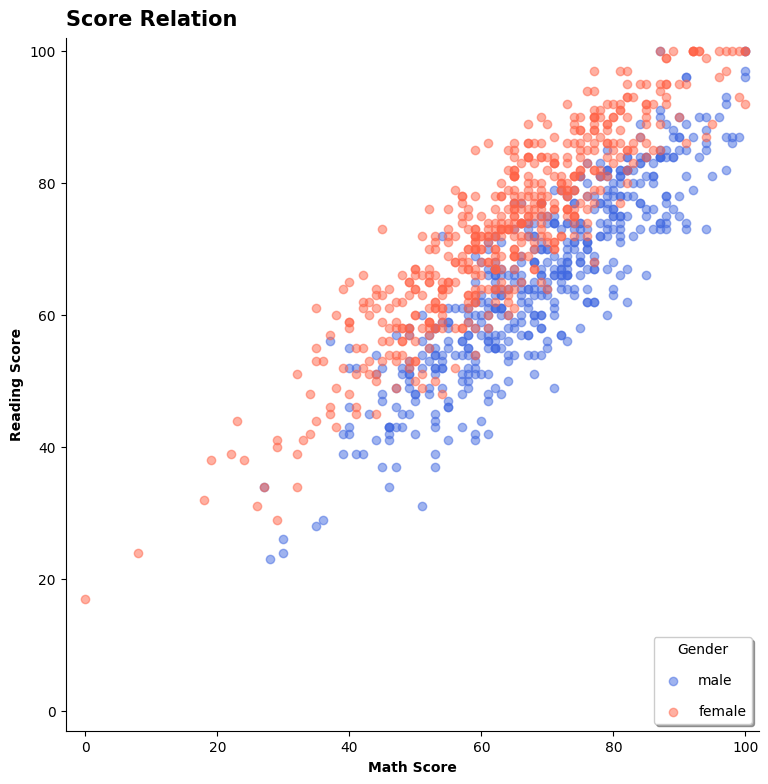

In [16]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

for g, c in zip(['male', 'female'], ['royalblue', 'tomato']):
    student_sub = student[student['gender']==g]
    ax.scatter(x=student_sub ['math score'], y=student_sub ['reading score'],
               c=c,
               alpha=0.5, 
               label=g)
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score', 
              fontweight='semibold')
ax.set_ylabel('Reading Score', 
              fontweight='semibold')

ax.set_title('Score Relation', 
             loc='left', va='bottom',
             fontweight='bold', fontsize=15
            )

ax.legend(
    title='Gender',
    shadow=True,
    labelspacing=1.2,
    loc='lower right',
    # bbox_to_anchor=[1.2, 0.5]
)

plt.show()

- bbox_to_anchor을 더 이해하고 싶다면 [link](https://stackoverflow.com/questions/39803385/what-does-a-4-element-tuple-argument-for-bbox-to-anchor-mean-in-matplotlib/39806180#39806180) 참고

### 3-2. Ticks & Text

- tick을 없애거나 조정하는 방법
- text의 alignment가 필요한 이유

In [10]:
def score_band(x):
    tmp = (x+9)//10
    if tmp <= 1: 
        return '0 - 10'
    return f'{tmp*10-9} - {tmp*10}'

student['math-range'] = student['math score'].apply(score_band)
student['math-range'].value_counts().sort_index()

math-range
0 - 10        2
11 - 20       2
21 - 30      12
31 - 40      34
41 - 50     100
51 - 60     189
61 - 70     270
71 - 80     215
81 - 90     126
91 - 100     50
Name: count, dtype: int64

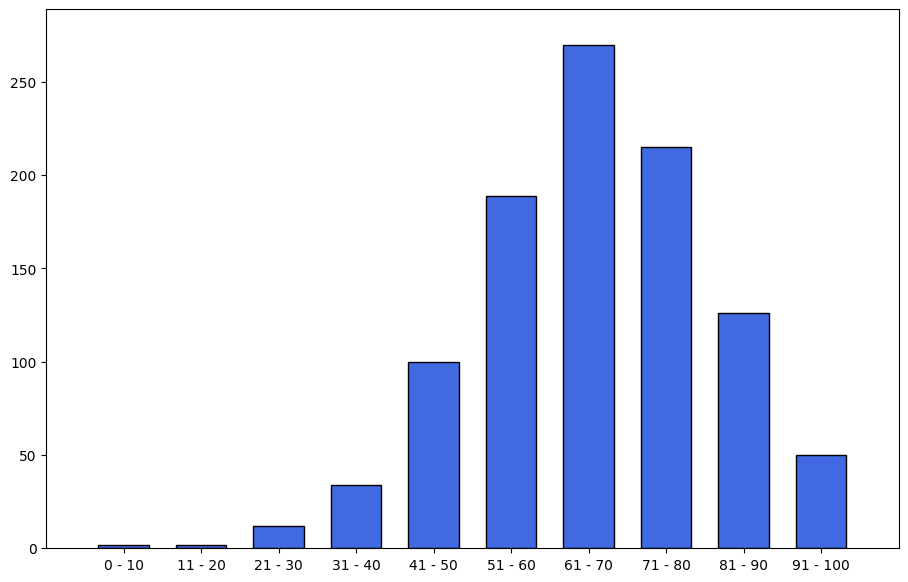

In [11]:
math_grade = student['math-range'].value_counts().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(11, 7))
ax.bar(math_grade.index, math_grade,
       width=0.65, 
       color='royalblue',
       linewidth=1,
       edgecolor='black'
      )

ax.margins(0.07)
plt.show()

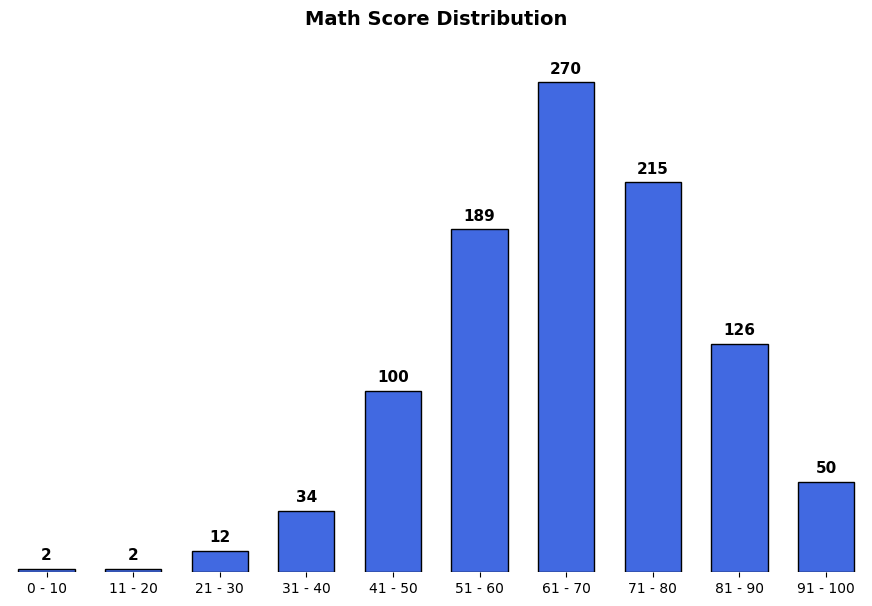

In [12]:
math_grade = student['math-range'].value_counts().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(11, 7))
ax.bar(math_grade.index, math_grade,
       width=0.65, 
       color='royalblue',
       linewidth=1,
       edgecolor='black'
      )

ax.margins(0.01, 0.1)
ax.set(frame_on=False)    # 차트 테두리 끄기
ax.set_yticks([])
ax.set_xticks(np.arange(len(math_grade)))
ax.set_xticklabels(math_grade.index)

ax.set_title('Math Score Distribution', fontsize=14, fontweight='semibold')

for idx, val in zip(math_grade.index, math_grade.values):
    ax.text(x=idx, y=val+3, s=val,
            va='bottom', ha='center',
            fontsize=11, fontweight='semibold'
           )

plt.show()

### 3-3. Annotate

- 화살표 사용하기

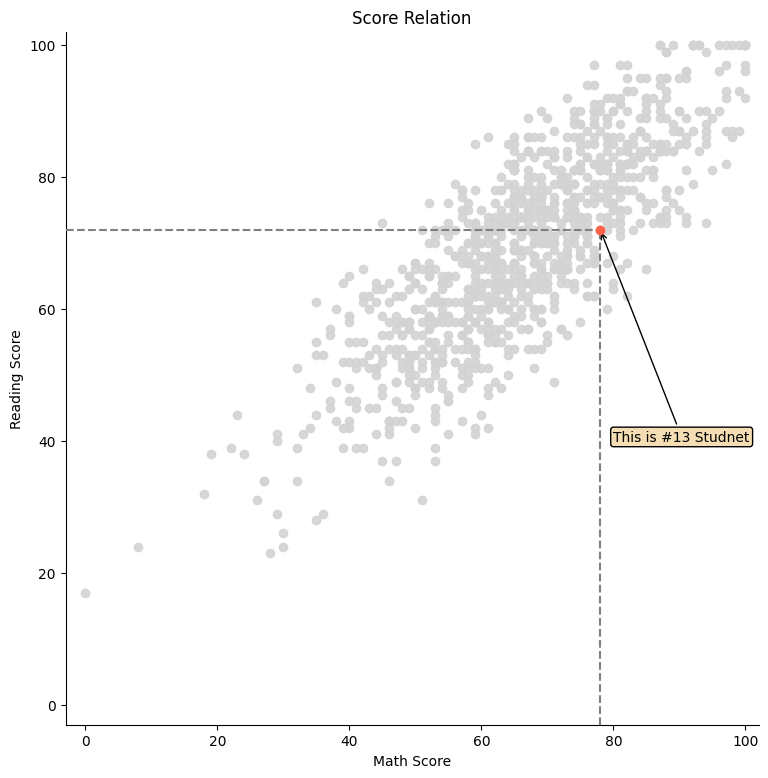

In [13]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

i = 13

ax.scatter(x=student['math score'], y=student['reading score'],
           c='lightgray',
           alpha=0.9, zorder=5)
    
ax.scatter(x=student['math score'][i], y=student['reading score'][i],
           c='tomato',
           alpha=1, zorder=10)    
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation') 

# x축과 평행한 선
ax.plot([-3, student['math score'][i]], [student['reading score'][i]]*2,
        color='gray', linestyle='--',
        zorder=8)

# y축과 평행한 선
ax.plot([student['math score'][i]]*2, [-3, student['reading score'][i]],
       color='gray', linestyle='--',
       zorder=8)

bbox = dict(boxstyle="round", fc='wheat', pad=0.2)
arrowprops = dict(
    arrowstyle="->")

ax.annotate(text=f'This is #{i} Studnet',
            xy=(student['math score'][i], student['reading score'][i]),
            xytext=[80, 40],
            bbox=bbox,
            arrowprops=arrowprops,
            zorder=9
           )

plt.show()

### **콘텐츠 라이선스**

<font color='red'><b>**WARNING**</b></font> : **본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다.** 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다.

